# Fetching, centralizing and documenting test data
- A documentation of the sources is [this Google sheet](https://docs.google.com/spreadsheets/d/1eTS4stx-STC8y5kxJgluQLpv5yvIhIRv1f-Y4vdiIp8/edit#gid=0)
- When data is open it will be stored on the _**data/**_ directory

In [35]:
import geopandas as gpd
from shapely.geometry import Point

from shapely.ops import polygonize
import osmnx as ox

In [122]:
place = 'Madrid, Área metropolitana de Madrid y Corredor del Henares, Community of Madrid, Spain'

G = ox.graph_from_place(place, network_type='drive', simplify = True)
G_projected = ox.project_graph(G)

edges = ox.graph_to_gdfs(ox.get_undirected(G_projected), #prevents some (semi)duplicate geoms
                         nodes=False, edges=True,
                         node_geometry=False, fill_edge_geometry=True)
edges.to_crs(2062, inplace= True)
edges.head(3)

osmid  oneway lanes                name  \
u      v          key                                                
171946 26513145   0    807334397    True     4  Calle de Velázquez   
       3280496563 0    807334397    True     4  Calle de Velázquez   
       1209330272 0    321307751    True   NaN  Calle de Velázquez   

                           highway maxspeed reversed  length  \
u      v          key                                          
171946 26513145   0       tertiary       50    False  41.093   
       3280496563 0       tertiary       50    False  30.852   
       1209330272 0    residential      NaN    False  32.461   

                                                                geometry  \
u      v          key                                                      
171946 26513145   0    LINESTRING (600247.796 646721.109, 600250.422 ...   
       3280496563 0    LINESTRING (600242.659 646690.974, 600244.482 ...   
       1209330272 0    LINESTRING (600265.192 646697.507, 600261.267 ...   

                             from        to junction bridge  ref access  \
u      v          key                                                     
171946 26513145   0        171946  26513145      NaN    NaN  NaN    NaN   
       3280496563 0    3280496563    171946      NaN    NaN  NaN    NaN   
       1209330272 0    1209330272    171946      NaN    NaN  NaN    NaN   

                      tunnel width landuse est_width  
u      v          key                                 
171946 26513145   0      NaN   NaN     NaN       NaN  
       3280496563 0      NaN   NaN     NaN       NaN  
       1209330272 0      NaN   NaN     NaN       NaN

In [149]:
edges_copy = edges
#to save as gpkg no lists can be part of the gdf
print('Columns with TYPES == list:')
for col in edges_copy:
    if len(edges_copy[edges_copy[col].apply(type) == list]) >= 1 :
        print(col)
        edges_copy[col] = edges_copy[col].apply(lambda x: str(x))

savepath = 'madrid2062.gpkg'
edges_copy.to_file(savepath, engine="pyogrio")

Columns with TYPES == list:
osmid
lanes
name
highway
maxspeed
reversed
bridge
ref
access
tunnel


In [157]:
#loading data from file
mad = gpd.read_file('/Users/gregoriomaya/Desktop/GSoc_2022/gsoc2022_network_simpl/data/madrid2062.gpkg')
mad.set_index(['u', 'v', 'key'], inplace=True)
mad.head(3)

osmid  oneway lanes                name  \
u      v          key                                                
171946 26513145   0    807334397    True     4  Calle de Velázquez   
       3280496563 0    807334397    True     4  Calle de Velázquez   
       1209330272 0    321307751    True   nan  Calle de Velázquez   

                           highway maxspeed reversed  length        from  \
u      v          key                                                      
171946 26513145   0       tertiary       50    False  41.093      171946   
       3280496563 0       tertiary       50    False  30.852  3280496563   
       1209330272 0    residential      nan    False  32.461  1209330272   

                             to junction bridge  ref access tunnel width  \
u      v          key                                                      
171946 26513145   0    26513145     None    nan  nan    nan    nan  None   
       3280496563 0      171946     None    nan  nan    nan    nan  None   
       1209330272 0      171946     None    nan  nan    nan    nan  None   

                      landuse est_width  \
u      v          key                     
171946 26513145   0      None      None   
       3280496563 0      None      None   
       1209330272 0      None      None   

                                                                geometry  
u      v          key                                                     
171946 26513145   0    LINESTRING (600247.796 646721.109, 600250.422 ...  
       3280496563 0    LINESTRING (600242.659 646690.974, 600244.482 ...  
       1209330272 0    LINESTRING (600265.192 646697.507, 600261.267 ...

<AxesSubplot:>

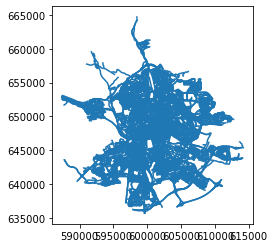

In [158]:
mad.plot()

## PENDING!! ---

- The idea is to have a diverse set of data which can help test networks of different _nature_ by using [GHS Degree of Urbanisation](https://ghsl.jrc.ec.europa.eu/download.php?ds=DUC)
### waiting for GHS DATA TO BE AVAILABLE SOON

<AxesSubplot:>

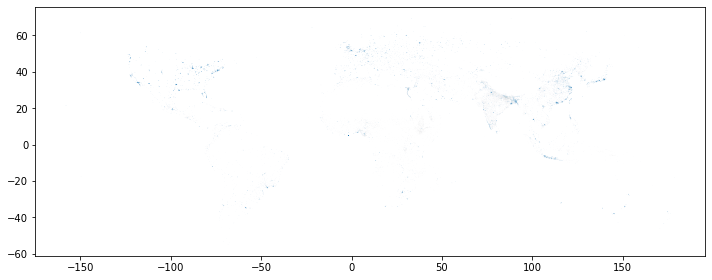

In [15]:
path = '/Users/gregoriomaya/Downloads/GHS_STAT_UCDB2015MT_GLOBE_R2019A/GHS_STAT_UCDB2015MT_GLOBE_R2019A_V1_2.gpkg'
# this is not the data that I'm really after ! 
gdf = gpd.read_file(path)
gdf.plot(figsize = (12,12))

In [19]:
print('SHAPE : '+ str(gdf.shape) )
gdf.head()

SHAPE : (13135, 161)


,ID_HDC_G0,QA2_1V,AREA,BBX_LATMN,BBX_LONMN,BBX_LATMX,BBX_LONMX,GCPNT_LAT,GCPNT_LON,CTR_MN_NM,...,EX_SS_P00,EX_SS_P15,EX_EQ19PGA,EX_EQ19MMI,EX_EQ19_Q,EX_HW_IDX,SDG_LUE9015,SDG_A2G14,SDG_OS15MX,geometry
0,1.0,1.0,185.0,21.247683,-158.043016,21.422193,-157.730529,21.340678,-157.893497,United States,...,397443.031445,444041.529529,NaN,NaN,missing,NaN,0.074385,0.226415,56.41,"MULTIPOLYGON (((-158.01244 21.42219, -157.9915..."
1,2.0,2.0,42.0,-17.641184,-149.628088,-17.517631,-149.508018,-17.534103,-149.568053,French Polynesia,...,0.000000,0.000000,NaN,NaN,missing,NaN,0.128,0.284119,NaN,"MULTIPOLYGON (((-149.56967 -17.51763, -149.508..."
2,3.0,1.0,55.0,34.858517,-120.475511,34.989334,-120.389183,34.923123,-120.434372,United States,...,0.000000,0.000000,0.0,0.0,available,2.79174,0.48114,0.040129,23.64,"MULTIPOLYGON (((-120.46375 34.98933, -120.4411..."
3,4.0,1.0,48.0,36.582997,-121.952215,36.635743,-121.811816,36.607720,-121.882378,United States,...,0.000000,0.000000,0.0,0.0,available,NaN,0.44484,0.138683,42.17,"MULTIPOLYGON (((-121.95221 36.63574, -121.9179..."
4,5.0,1.0,60.0,34.388220,-119.853855,34.457831,-119.658413,34.427664,-119.743693,United States,...,0.000000,0.000000,0.0,0.0,available,4.25502,0.55676,0.061348,36.50,"MULTIPOLYGON (((-119.82444 34.45783, -119.8131..."


In [34]:

Point(gdf[gdf.CTR_MN_NM == 'Colombia'].GCPNT_LAT , gdf[gdf.CTR_MN_NM == 'Colombia'].GCPNT_LON)

TypeError: cannot convert the series to <class 'float'>